<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Dataset** 
**Analysis and classification**

The famous iris database, first used by Sir R. A. Fisher, is perhaps the best known dataset to be found in pattern recognition literature. There are 150 iris plants, each with 4 numeric attributes: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm. The task is to predict each plant as an iris-setosa, an iris-versicolor, or an iris-virginica based on these attributes.





## Basic Data Exploration

Let's import pandas library, read csv file to DataFrame and take a quick look at it.

In [2]:
import pandas as pd
iris = pd.read_csv("iris.csv", header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'Species'], index_col=False)
iris.head()


,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# to inspect number of rows and columns

iris.shape

(150, 5)

All four features are numeric, each with different ranges. There are no missing values in any of the columns. 

The ranges of attributes are of similar magnitude, thus we will skip standardization. 

In [4]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Iris is a balanced dataset as the data points for each class are evenly distributed. 

In [5]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Let's plot an each individual variable.

Is's showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a symmetric bell shape. 
However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width. 

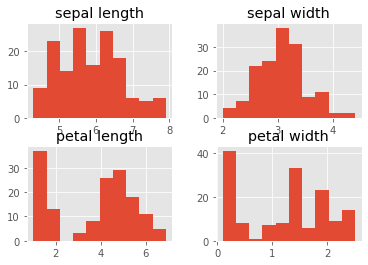

In [7]:
iris.hist()
plt.show()

###Multivariate Plot

Scatter plot can be used to see the interactions between the attributes. To better distinguish between them the color scheem is used.


####Sepal length and width

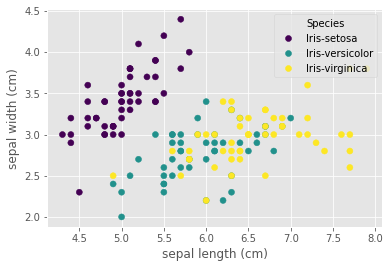

In [8]:
# build a dict mapping species to an integer code

inv_name_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# build integer color code 0/1/2

colors = [inv_name_dict[item] for item in iris['Species']] 

# scatter plot

scatter = plt.scatter(iris['sepal length'], iris['sepal width'], c = colors)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# add legend 
plt.legend(handles=scatter.legend_elements()[0],loc="upper right", title="Species", labels = inv_name_dict.keys())
plt.show()


#### Petal length and width

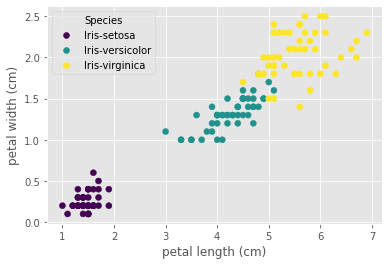

In [9]:
# scatter plot

scatter = plt.scatter(iris['petal length'], iris['petal width'],c = colors)

plt.xlabel('petal length (cm)')

plt.ylabel('petal width (cm)')

# add legend

plt.legend(handles= scatter.legend_elements()[0], title="Species", labels = inv_name_dict.keys())

plt.show()

Already visualy we can note that the length and width of the petal are highly correlated, and these two features are very useful to identify various iris species. However the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating the difficulties for some classifiers. 

#### Plot between all pairs

With this matrix plotting we can see the scatter plots of all pairs of attributes. It helps spot structured relationships between features.

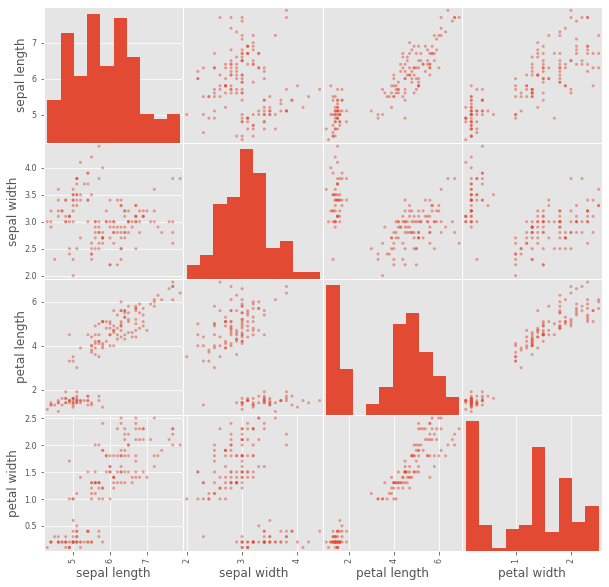

In [14]:
scatter_mtx = pd.plotting.scatter_matrix(iris, figsize=(10,10), )

## Classification


### Data Preparation

As it was seen before the length and the width of the petals are the most useful features to separate the species.

In [18]:
X = iris[['petal length', 'petal width']]

y = iris['Species']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)


In [25]:
# "stratify = y" is done to ensure that the distribution of labels remains similar in both train and test sets
print(y_train.value_counts())
print(y_test.value_counts())

Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: Species, dtype: int64
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: Species, dtype: int64


### Modeling

Scikit-learn library:

*  Import model
*  Instanciate
*  Apply
*  Predict

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
# metric='minkowski' and p=2 together defines that the distance used is euclidean distance. 

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# hard predict returns labels only
pred = knn.predict(X_test)
pred[10:12]

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

In [35]:
# soft predict returns the predicted probabilities of data points belonging to each of the classes
pred_prob = knn.predict_proba(X_test)
pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

### Model Evaluation

In [45]:
knn.score(X_test, y_test)

0.9777777777777777

or

In [46]:
 from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, pred).round(2)

0.98

#### Confusion Matrix

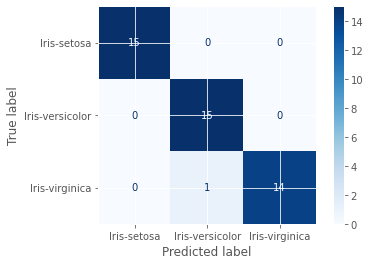

In [53]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

conf_mtx = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

#### K-fold Cross Validation

We can not rely on one single train-test split, rather we report the accuracy based on a k-fold cross validation. 
Especially if the Iris dataset isn't large in sample size, cross validation becomes more acceptable.


In [59]:
from sklearn.model_selection import cross_val_score

# create a new model with knn parameter 3

knn_cv = KNeighborsClassifier(n_neighbors=5)

In [60]:
# train model with 5-fold cv

cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [62]:
cv_scores.mean().round(2)

0.97

#### Tuning the hyperparameter -- Grid Search

In [66]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# create new a knn model

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to train the model on all values for n_neighbors and compute cross validation score

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data

knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
# To check the top performing n_neighbors value and accuracy of model

print("Best parameter for knn is {} with accuracy score {}%".format(knn_gscv.best_params_['n_neighbors'], knn_gscv.best_score_.round(3)*100))


Best parameter for knn is 4 with accuracy score 96.7%


### Final Model build

In [81]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print("{}%".format(knn_final.score(X, y).round(3)*100))


97.3%


### Label Prediction with New Data

In [1]:
# this model requires 2D array
new_data = np.array([[3.76, 1.2],[5.25, 1.2]])

NameError: ignored

In [2]:
knn_final.predict(new_data)

NameError: ignored